In [4]:
%matplotlib inline
import os
import matplotlib.pyplot as plt

base_path = "Data"
folder_counts = {}

def visualize_images_in_folders(base_path):
    total_images = 0
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        if os.path.isdir(folder_path):
            count = len([f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))])
            folder_counts[folder] = count
            total_images += count
        print(f"Number of Images: {count}, Folder: {folder}")
    print(f"Total Images: {total_images}")
    # Visualize
    plt.figure(figsize=(10, 6))
    plt.bar(folder_counts.keys(), folder_counts.values())
    plt.xlabel('Folder')
    plt.ylabel('Number of Images')
    plt.title('Number of Images in Each Folder')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

Number of Images: 1708, Folder: 111_Paper_box
Number of Images: 2786, Folder: 112_Paper_other
Number of Images: 3049, Folder: 121_Plastic_box
Number of Images: 1146, Folder: 122_Plastic_cups
Number of Images: 2984, Folder: 131_Metal_package
Number of Images: 2641, Folder: 132_Metal_other
Number of Images: 3263, Folder: 141_Glass_bottle
Number of Images: 1191, Folder: 143_Glass_other
Number of Images: 3000, Folder: 151_Fabric_leather
Number of Images: 1443, Folder: 161_Wood_household
Number of Images: 864, Folder: 171_Rubber_toy
Number of Images: 1019, Folder: 172_Rubber_other
Number of Images: 3575, Folder: 181_Electrical_small
Number of Images: 2541, Folder: 182_Electrical_large
Number of Images: 1012, Folder: 211_Food_leftover
Number of Images: 1733, Folder: 212_Food_other
Number of Images: 1184, Folder: 3111_Hazardous_other
Number of Images: 2224, Folder: 3112_Hazardous_medical
Number of Images: 969, Folder: 312_Hazardous_light
Number of Images: 943, Folder: 313_Hazardous_battery
Nu

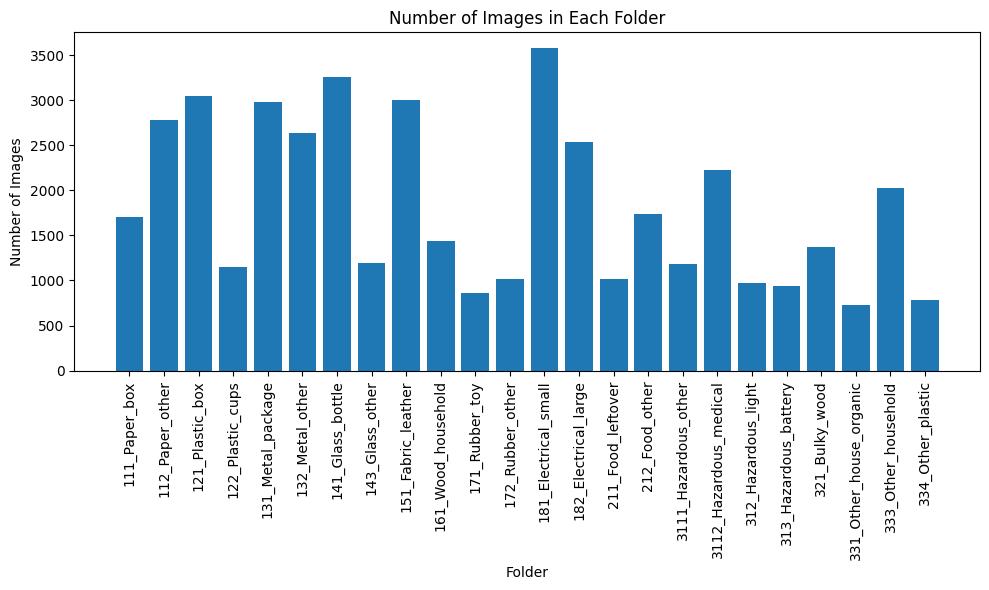

In [2]:
visualize_images_in_folders(base_path)

# Install library

In [ ]:
!pip install scikit-learn


In [6]:
!pip install albumentations

  Using cached albumentations-2.0.7-py3-none-any.whl.metadata (43 kB)
  Using cached pydantic-2.11.5-py3-none-any.whl.metadata (67 kB)
  Using cached albucore-0.0.24-py3-none-any.whl.metadata (5.3 kB)
  Using cached eval_type_backport-0.2.2-py3-none-any.whl.metadata (2.2 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
Using cached albumentations-2.0.7-py3-none-any.whl (367 kB)
Using cached albucore-0.0.24-py3-none-any.whl (15 kB)
Using cached pydantic-2.11.5-py3-none-any.whl (444 kB)
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
Using cached eval_type_backport-0.2.2-py3-none-any.whl (5.8 kB)

   ---------------------------------------- 0/5 [eval-type-backport]
   ---------------- ----------------------- 2/5 [pydantic]
   ---------------- ----------------------- 2/5 [pydantic]
   ---------------- ----------------------- 2/5 [pydantic]
   ---------------- ----------------------- 2/5 [pydantic]
   ---------------- ----------------------- 2/5 [pydan

In [14]:
!pip install numpy

# Data preprocessing

In [4]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.utils.class_weight import compute_class_weight

In [5]:
from torchvision import transforms
from PIL import Image
import random

In [6]:

import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2

In [14]:
import numpy as np

In [21]:
from torch.utils.data import DataLoader, WeightedRandomSampler


## Data Augmentation

In [7]:
augmentation_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [8]:
def augment_and_save(image_path, save_dir, num_augmented=1000):
    image = Image.open(image_path).convert('RGB')
    base_name = os.path.splitext(os.path.basename(image_path))[0]
    for i in range(num_augmented):
        augmented = augmentation_transforms(image)
        save_path = os.path.join(save_dir, f"{base_name}_aug_{i}.jpg")
        transforms.ToPILImage()(augmented).save(save_path)

In [ ]:
min_images = 1500
for folder, count in folder_counts.items():
    if count < min_images:
        folder_path = os.path.join(base_path, folder)
        save_dir = folder_path  
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                img_path = os.path.join(folder_path, img_file)
                augment_and_save(img_path, save_dir, num_augmented=(min_images // count - 1))

print("Data augmentation completed for classes with less than 1000 images.")

c:\Users\dangn\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Data augmentation completed for classes with less than 1000 images.


Number of Images: 1708, Folder: 111_Paper_box
Number of Images: 2786, Folder: 112_Paper_other
Number of Images: 3049, Folder: 121_Plastic_box
Number of Images: 1146, Folder: 122_Plastic_cups
Number of Images: 2984, Folder: 131_Metal_package
Number of Images: 2641, Folder: 132_Metal_other
Number of Images: 3263, Folder: 141_Glass_bottle
Number of Images: 1191, Folder: 143_Glass_other
Number of Images: 3000, Folder: 151_Fabric_leather
Number of Images: 1443, Folder: 161_Wood_household
Number of Images: 864, Folder: 171_Rubber_toy
Number of Images: 1019, Folder: 172_Rubber_other
Number of Images: 3575, Folder: 181_Electrical_small
Number of Images: 2541, Folder: 182_Electrical_large
Number of Images: 1012, Folder: 211_Food_leftover
Number of Images: 1733, Folder: 212_Food_other
Number of Images: 1184, Folder: 3111_Hazardous_other
Number of Images: 2224, Folder: 3112_Hazardous_medical
Number of Images: 969, Folder: 312_Hazardous_light
Number of Images: 943, Folder: 313_Hazardous_battery
Nu

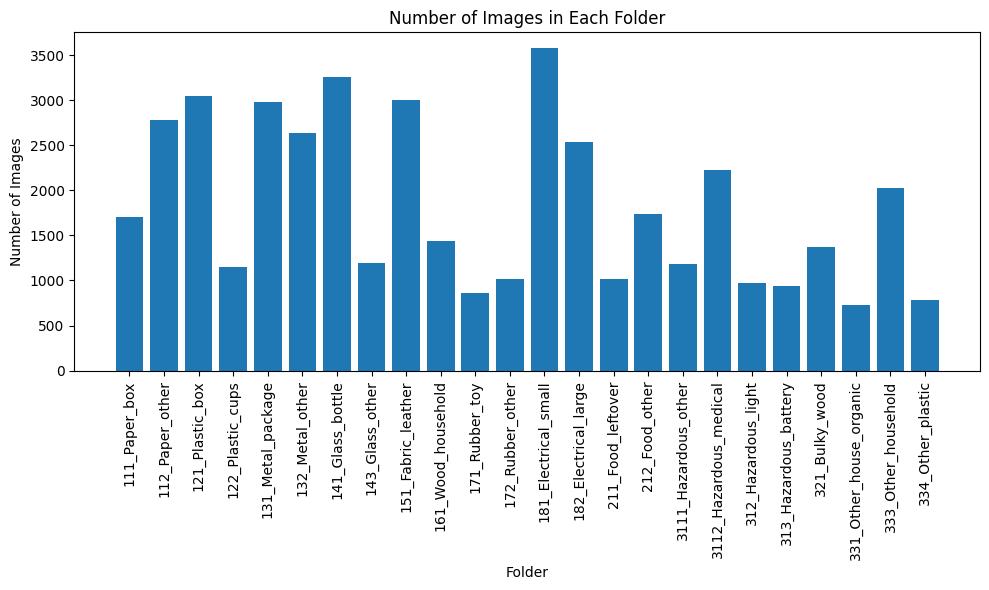

In [10]:
visualize_images_in_folders(base_path)

In [13]:
class_counts  = list(folder_counts.values())
class_counts 

[1708,
 2786,
 3049,
 1146,
 2984,
 2641,
 3263,
 1191,
 3000,
 1443,
 864,
 1019,
 3575,
 2541,
 1012,
 1733,
 1184,
 2224,
 969,
 943,
 1374,
 724,
 2027,
 788]

## Data normalization

In [ ]:
import os
from PIL import Image

target_size = (256, 256)

for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                img_path = os.path.join(folder_path, img_file)
                try:
                    img = Image.open(img_path)
                    changed = False

                    if img.mode != 'RGB':
                        img = img.convert('RGB')
                        changed = True

                    if img.size != target_size:
                        img = img.resize(target_size, Image.Resampling.LANCZOS)
                        changed = True

                    if changed:
                        img.save(img_path)
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")

print("Data normalization completed for all images.")

In [17]:
weight = 1.0 / np.array(class_counts)
weight

array([0.00058548, 0.00035894, 0.00032798, 0.0008726 , 0.00033512,
       0.00037864, 0.00030647, 0.00083963, 0.00033333, 0.000693  ,
       0.00115741, 0.00098135, 0.00027972, 0.00039355, 0.00098814,
       0.00057703, 0.00084459, 0.00044964, 0.00103199, 0.00106045,
       0.0007278 , 0.00138122, 0.00049334, 0.00126904])

## WeightedRandomSampler 

In [16]:
labels = list(folder_counts.keys())
labels

['111_Paper_box',
 '112_Paper_other',
 '121_Plastic_box',
 '122_Plastic_cups',
 '131_Metal_package',
 '132_Metal_other',
 '141_Glass_bottle',
 '143_Glass_other',
 '151_Fabric_leather',
 '161_Wood_household',
 '171_Rubber_toy',
 '172_Rubber_other',
 '181_Electrical_small',
 '182_Electrical_large',
 '211_Food_leftover',
 '212_Food_other',
 '3111_Hazardous_other',
 '3112_Hazardous_medical',
 '312_Hazardous_light',
 '313_Hazardous_battery',
 '321_Bulky_wood',
 '331_Other_house_organic',
 '333_Other_household',
 '334_Other_plastic']

In [19]:
label_to_weight = dict(zip(labels, weight))
samples_weight = np.array([label_to_weight[t] for t in labels])
samples_weight

array([0.00058548, 0.00035894, 0.00032798, 0.0008726 , 0.00033512,
       0.00037864, 0.00030647, 0.00083963, 0.00033333, 0.000693  ,
       0.00115741, 0.00098135, 0.00027972, 0.00039355, 0.00098814,
       0.00057703, 0.00084459, 0.00044964, 0.00103199, 0.00106045,
       0.0007278 , 0.00138122, 0.00049334, 0.00126904])

In [26]:
from torch.utils.data import DataLoader, WeightedRandomSampler
import torch

In [27]:
samples_weight = torch.from_numpy(samples_weight).float()
sampler = WeightedRandomSampler(samples_weight, len(samples_weight))
sampler

In [ ]:
import json

label_mapping = {i: label for i, label in enumerate(labels)}
with open('label_mapping.json', 'w', encoding='utf-8') as f:
    json.dump(label_mapping, f, ensure_ascii=False, indent=4)
print("Saved label_mapping.json")

with open('dataset_structure.json', 'w', encoding='utf-8') as f:
    json.dump(folder_counts, f, ensure_ascii=False, indent=4)
print("Saved dataset_structure.json")

Đã lưu label_mapping.json
Đã lưu dataset_structure.json


## Split data

70% train, 15% val, 15% test

In [31]:
from sklearn.model_selection import train_test_split

all_samples = []
for class_name in os.listdir(base_path):
    class_dir = os.path.join(base_path, class_name)
    if os.path.isdir(class_dir):
        label = list(label_mapping.keys())[list(label_mapping.values()).index(class_name)]
        for img_file in os.listdir(class_dir):
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                img_path = os.path.join(class_dir, img_file)
                all_samples.append((img_path, int(label)))

train_val, test = train_test_split(all_samples, test_size=0.15, stratify=[s[1] for s in all_samples], random_state=42)
train, val = train_test_split(train_val, test_size=0.1765, stratify=[s[1] for s in train_val], random_state=42) # 0.1765*0.85 ≈ 0.15

print(f"Train: {len(train)}, Val: {len(val)}, Test: {len(test)}")


Train: 30929, Val: 6630, Test: 6629


## Custom Datasets

In [ ]:
from PIL import Image, UnidentifiedImageError

class WasteDataset(Dataset):
    def __init__(self, samples, transform=None):
        self.samples = samples
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert('RGB')
        try:
            image = Image.open(img_path).convert('RGB')
        except UnidentifiedImageError:
            print(f"⚠️ Skipping corrupted image: {img_path}")
            return self.__getitem__((idx + 1) % len(self.samples))
        if self.transform:
            image = self.transform(image)
        return image, label

In [ ]:
import torchvision.transforms as T

train_transform = T.Compose([
    T.Resize((256, 256)),
    T.RandomHorizontalFlip(),
    T.RandomRotation(10),
    T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

val_transform = T.Compose([
    T.Resize((256, 256)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])


In [36]:
train_dataset = WasteDataset(train, transform=train_transform)
val_dataset = WasteDataset(val, transform=val_transform)
test_dataset = WasteDataset(test, transform=val_transform)

## Data Loader

In [37]:
from torch.utils.data import DataLoader, WeightedRandomSampler
import numpy as np
import torch

train_labels = [label for _, label in train]
class_sample_count = np.array([np.sum(np.array(train_labels) == t) for t in np.unique(train_labels)])
weight = 1. / class_sample_count
samples_weight = np.array([weight[t] for t in train_labels])

samples_weight = torch.from_numpy(samples_weight).float()
sampler = WeightedRandomSampler(samples_weight, len(samples_weight), replacement=True)

train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Training

In [38]:
import torch.nn as nn
import torchvision.models as models

def get_model(name, num_classes):
    if name == 'resnet18':
        model = models.resnet18(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif name == 'resnet50':
        model = models.resnet50(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif name == 'mobilenetv2':
        model = models.mobilenet_v2(pretrained=True)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    elif name == 'densenet121':
        model = models.densenet121(pretrained=True)
        model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    elif name == 'efficientnet_b0':
        model = models.efficientnet_b0(pretrained=True)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    elif name == 'vgg16':
        model = models.vgg16_bn(pretrained=True)
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
    else:
        raise ValueError("Model not supported")
    return model


In [40]:
from tqdm import tqdm

def train_and_eval(model, train_loader, val_loader, device, epochs=50):
    import torch
    import torch.nn.functional as F
    import torch.optim as optim
    from sklearn.metrics import accuracy_score, f1_score

    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Train Loss: {total_loss/len(train_loader):.4f}")

    # Evaluate
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"Validation Accuracy: {acc:.4f}, F1-score: {f1:.4f}")
    return acc, f1


In [41]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_names = ['resnet18', 'resnet50', 'mobilenetv2', 'densenet121', 'efficientnet_b0']
results = []

num_classes = 24

for name in model_names:
    print(f"\n===== Training model: {name} =====")
    model = get_model(name, num_classes)
    acc, f1 = train_and_eval(model, train_loader, val_loader, device)
    results.append({'model': name, 'accuracy': acc, 'f1_score': f1})



===== Training model: resnet18 =====
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\dangn/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


c:\Users\dangn\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\dangn\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
 98%|█████████▊| 43.9M/44.7M [00:08<00:00, 5.32MB/s]


KeyboardInterrupt: 